In [310]:
# importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [311]:
# load the data
file_path = "./ad_10000records.csv"
raw_data = pd.read_csv(file_path, header=0) 
df = raw_data.copy(deep=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


# As you can see there is no missing value

In [313]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\2113028745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Clicked on Ad", data=df, palette='viridis')


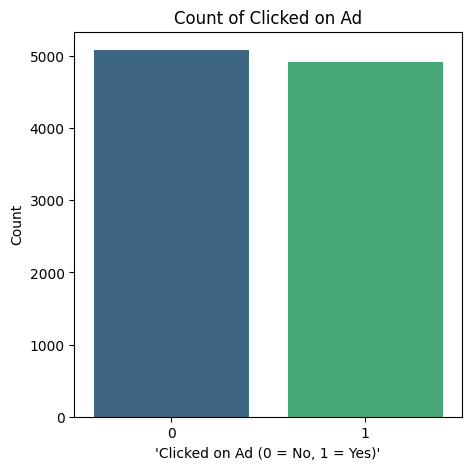

In [314]:
plt.figure(figsize=(5,5))
sns.countplot(x = "Clicked on Ad", data=df, palette='viridis')
plt.xlabel("'Clicked on Ad (0 = No, 1 = Yes)'")
plt.ylabel("Count")
plt.title("Count of Clicked on Ad")
plt.show()

# As we can see, the number of 0s and 1s are almost equal (0s are a little bit larger), so we can say that the target feature is almost balanced

In [315]:
X_train = df[df['Timestamp'] < '2016-06-01 00:00:00']
X_test = df[df['Timestamp'] >= '2016-06-01 00:00:00']

y_train = X_train['Clicked on Ad']
y_test = X_test['Clicked on Ad']

# Because of datetime feature, we use past records for training and recent records for testing

In [316]:
def count_encoding(columns, X_train):
    for i in columns:
        count_map = X_train.groupby(i).size().to_dict()
        X_train[i+' Code'] = X_train[i].map(count_map)
    

In [317]:
# using count encoding for Ad Topic Line, City, Country
columns = ["Ad Topic Line", "City", "Country"]
count_encoding(columns, X_train)
count_encoding(columns, X_test)

X_train.head()

C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\3972536090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i+' Code'] = X_train[i].map(count_map)
C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\3972536090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i+' Code'] = X_train[i].map(count_map)
C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\3972536090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Ad Topic Line Code,City Code,Country Code
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,50,72,60
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,Female,Cameroon,2016-05-15 13:18:34,0,15,2,66
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,Male,Turkey,2016-04-03 21:13:46,1,149,138,237
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,Male,French Guiana,2016-03-11 06:49:10,0,69,85,42
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,Male,Vanuatu,2016-03-24 06:36:52,0,24,4,116


# Because of diversity in "Ad Topic Line", "City", "Country", we use count encoding for these features

In [318]:
# using on-hot encoding for gender column
X_train = pd.get_dummies(X_train, columns=['Gender'])
X_test = pd.get_dummies(X_test, columns=['Gender'])
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad,Ad Topic Line Code,City Code,Country Code,Gender_Female,Gender_Male
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Singapore,2016-01-16 17:56:05,0,50,72,60,False,True
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,Cameroon,2016-05-15 13:18:34,0,15,2,66,True,False
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,Turkey,2016-04-03 21:13:46,1,149,138,237,False,True
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,French Guiana,2016-03-11 06:49:10,0,69,85,42,False,True
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,Vanuatu,2016-03-24 06:36:52,0,24,4,116,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Singapore,2016-01-03 03:22:15,1,12,72,60,False,True
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Luxembourg,2016-05-28 12:20:15,0,43,40,122,False,True
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Egypt,2016-01-05 11:53:17,0,147,88,25,True,False
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Malawi,2016-04-04 07:07:46,1,58,17,16,True,False


In [319]:
X_train['Timestamp'] = pd.to_datetime(X_train['Timestamp'])
X_test['Timestamp'] = pd.to_datetime(X_test['Timestamp'])
# Extract year, month, day, and hour into new columns
X_train['Year'] = X_train['Timestamp'].dt.year
X_train['Month'] = X_train['Timestamp'].dt.month
X_train['Day'] = X_train['Timestamp'].dt.day
X_train['Hour'] = X_train['Timestamp'].dt.hour

X_test['Year'] = X_test['Timestamp'].dt.year
X_test['Month'] = X_test['Timestamp'].dt.month
X_test['Day'] = X_test['Timestamp'].dt.day
X_test['Hour'] = X_test['Timestamp'].dt.hour

X_train = pd.DataFrame(X_train.drop(columns = ["Timestamp"]))
X_test = pd.DataFrame(X_test.drop(columns = ["Timestamp"]))


X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Clicked on Ad,Ad Topic Line Code,City Code,Country Code,Gender_Female,Gender_Male,Year,Month,Day,Hour
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Singapore,0,50,72,60,False,True,2016,1,16,17
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,Cameroon,0,15,2,66,True,False,2016,5,15,13
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,Turkey,1,149,138,237,False,True,2016,4,3,21
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,French Guiana,0,69,85,42,False,True,2016,3,11,6
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,Vanuatu,0,24,4,116,False,True,2016,3,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Singapore,1,12,72,60,False,True,2016,1,3,3
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Luxembourg,0,43,40,122,False,True,2016,5,28,12
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Egypt,0,147,88,25,True,False,2016,1,5,11
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Malawi,1,58,17,16,True,False,2016,4,4,7


# Extracting year, month, day and hour from Timestamp for feature engineering

In [320]:
X_train['Year'].unique()

array([2016])

# Because year is the same for all records so it does not have any effect, so we drop it.

In [321]:
X_train = X_train.drop(columns="Year")
X_test = X_test.drop(columns="Year")
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Clicked on Ad,Ad Topic Line Code,City Code,Country Code,Gender_Female,Gender_Male,Month,Day,Hour
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Singapore,0,50,72,60,False,True,1,16,17
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,Cameroon,0,15,2,66,True,False,5,15,13
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,Turkey,1,149,138,237,False,True,4,3,21
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,French Guiana,0,69,85,42,False,True,3,11,6
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,Vanuatu,0,24,4,116,False,True,3,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Singapore,1,12,72,60,False,True,1,3,3
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Luxembourg,0,43,40,122,False,True,5,28,12
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Egypt,0,147,88,25,True,False,1,5,11
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Malawi,1,58,17,16,True,False,4,4,7


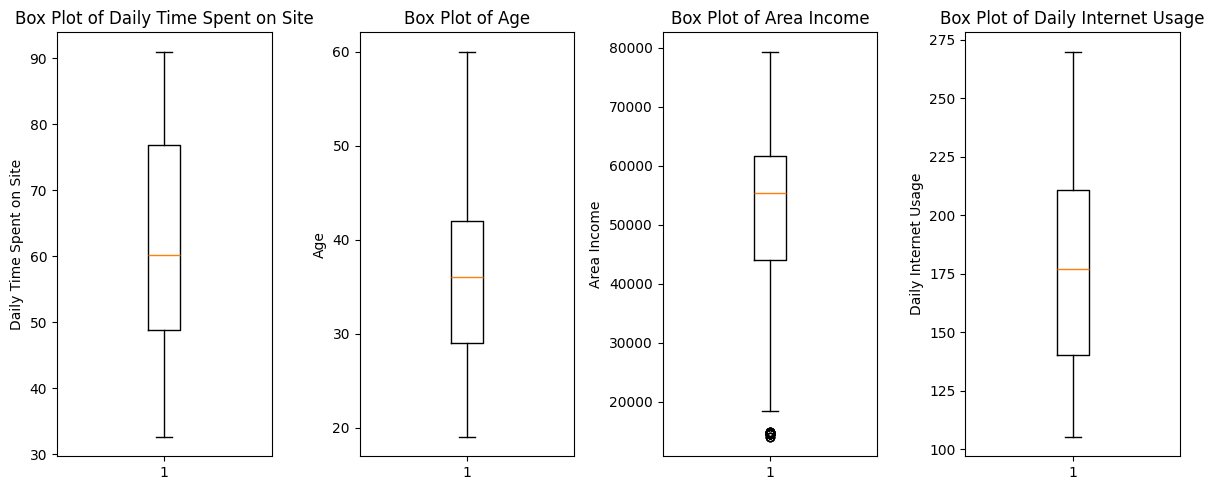

In [322]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))


axes[0].boxplot(X_train['Daily Time Spent on Site'])
axes[0].set_title('Box Plot of Daily Time Spent on Site')
axes[0].set_ylabel('Daily Time Spent on Site')

axes[1].boxplot(X_train['Age'])
axes[1].set_title('Box Plot of Age')
axes[1].set_ylabel('Age')

axes[2].boxplot(X_train['Area Income'])
axes[2].set_title('Box Plot of Area Income')
axes[2].set_ylabel('Area Income')

axes[3].boxplot(X_train['Daily Internet Usage'])
axes[3].set_title('Box Plot of Daily Internet Usage')
axes[3].set_ylabel('Daily Internet Usage')


plt.tight_layout()
plt.show()

In [323]:
def outliers_capping(X_train, columns):
    for i in columns:
        Q1 = X_train[i].quantile(0.25)
        Q3 = X_train[i].quantile(0.75)

        IQR = Q3 - Q1 
        upper_limit = Q3 + 1.5 * IQR 
        lower_limit = Q1 - 1.5 * IQR 

        # Handlign outilers using capping method 
        iqr_X_train_cap = X_train.copy(deep=True)
        iqr_X_train_cap[i] = np.where(X_train[i] > upper_limit, upper_limit, np.where(X_train[i] < lower_limit, lower_limit, X_train[i]))
        print(f"{len(X_train) - len(iqr_X_train_cap)} data points were removed using Capping in column {i}" )
        X_train = iqr_X_train_cap

In [324]:
columns = ['Daily Internet Usage', 'Area Income', 'Age', 'Daily Time Spent on Site']
outliers_capping(X_train, columns)

0 data points were removed using Capping in column Daily Internet Usage
0 data points were removed using Capping in column Area Income
0 data points were removed using Capping in column Age
0 data points were removed using Capping in column Daily Time Spent on Site


# We used boxplot for detecting outliers and after that, we used capping method for dropping the outliers.

C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\765208171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Clicked on Ad', data=clicks_per_month, palette='viridis')


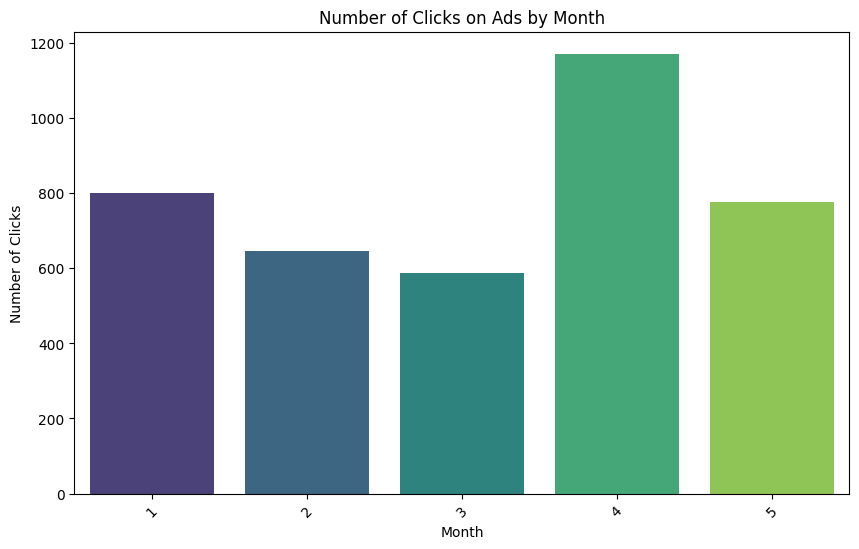

In [325]:
clicks_per_month = X_train.groupby("Month")["Clicked on Ad"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Clicked on Ad', data=clicks_per_month, palette='viridis')
plt.title('Number of Clicks on Ads by Month')
plt.xlabel('Month')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()


C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\1873271846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Clicked on Ad', data=clicks_per_day, palette='viridis')


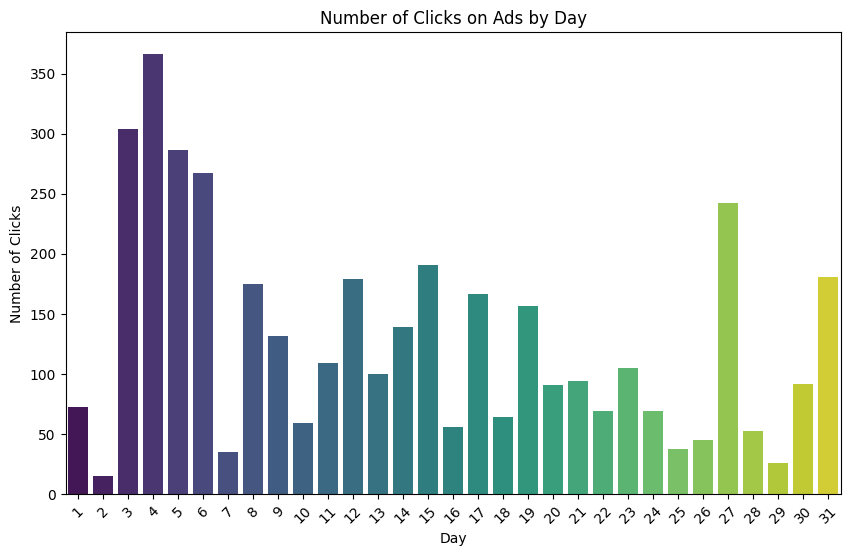

In [326]:
clicks_per_day = X_train.groupby("Day")["Clicked on Ad"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Day', y='Clicked on Ad', data=clicks_per_day, palette='viridis')
plt.title('Number of Clicks on Ads by Day')
plt.xlabel('Day')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()

C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\3086724759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Clicked on Ad', data=clicks_per_hour, palette='viridis')


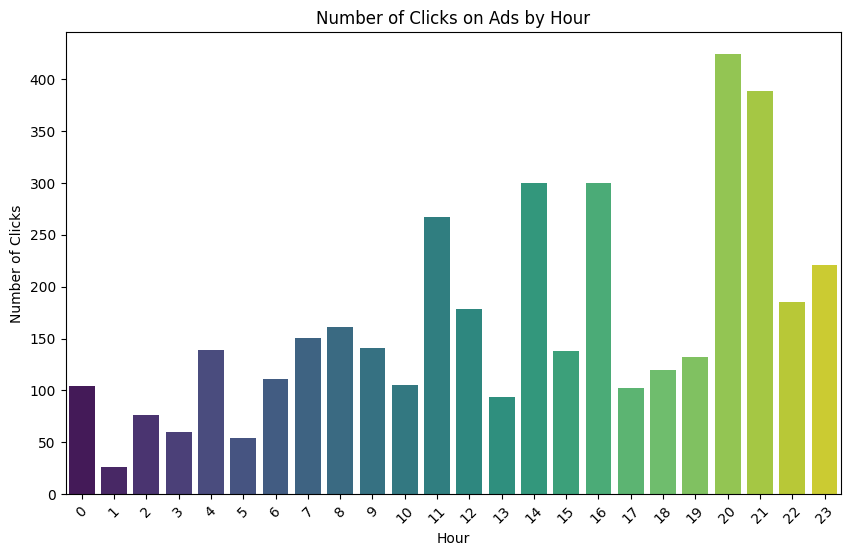

In [327]:
clicks_per_hour = X_train.groupby("Hour")["Clicked on Ad"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Hour', y='Clicked on Ad', data=clicks_per_hour, palette='viridis')
plt.title('Number of Clicks on Ads by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()

C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\1893831389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Clicked on Ad', data=clicks_per_city, palette='viridis')


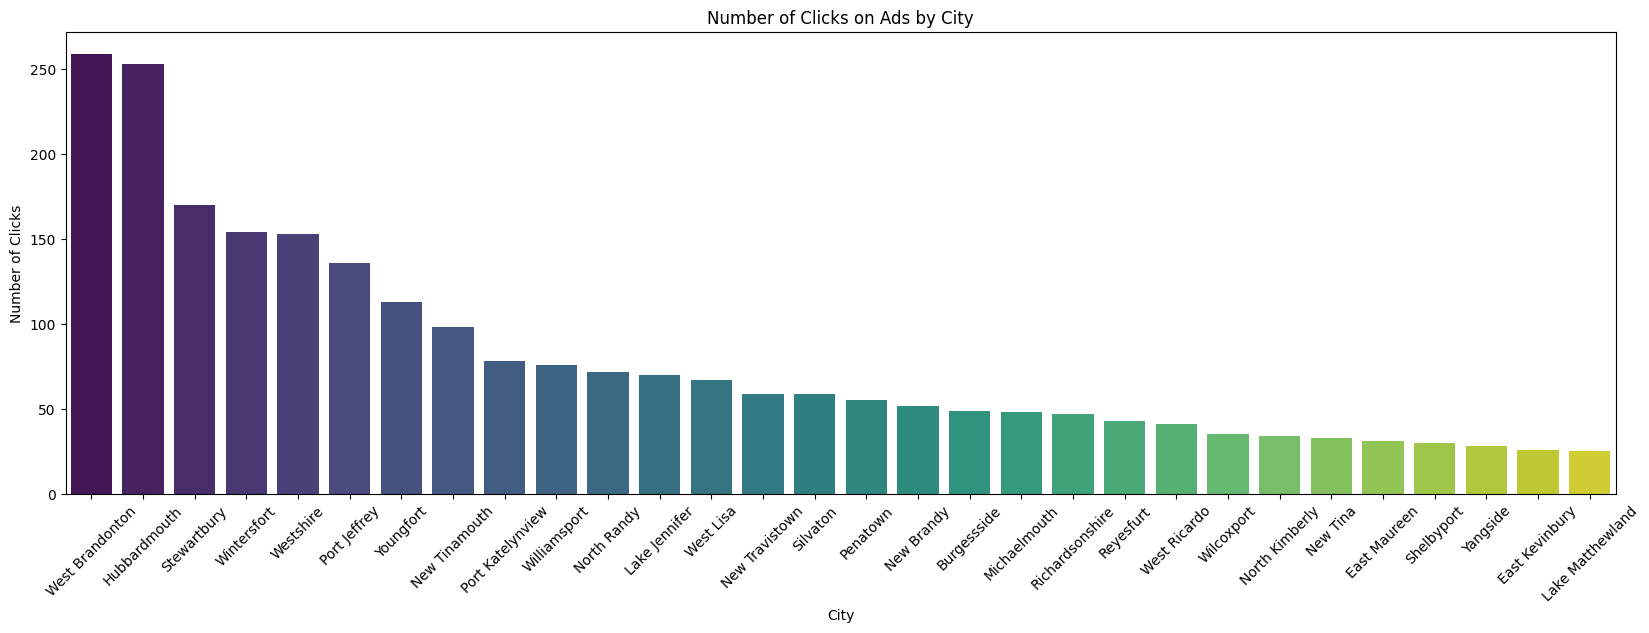

In [328]:
clicks_per_city = X_train.groupby("City")["Clicked on Ad"].sum().nlargest(30).reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='City', y='Clicked on Ad', data=clicks_per_city, palette='viridis')
plt.title('Number of Clicks on Ads by City')
plt.xlabel('City')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()

C:\Users\mkaze\AppData\Local\Temp\ipykernel_10200\865606758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Clicked on Ad', data=clicks_per_country, palette='viridis')


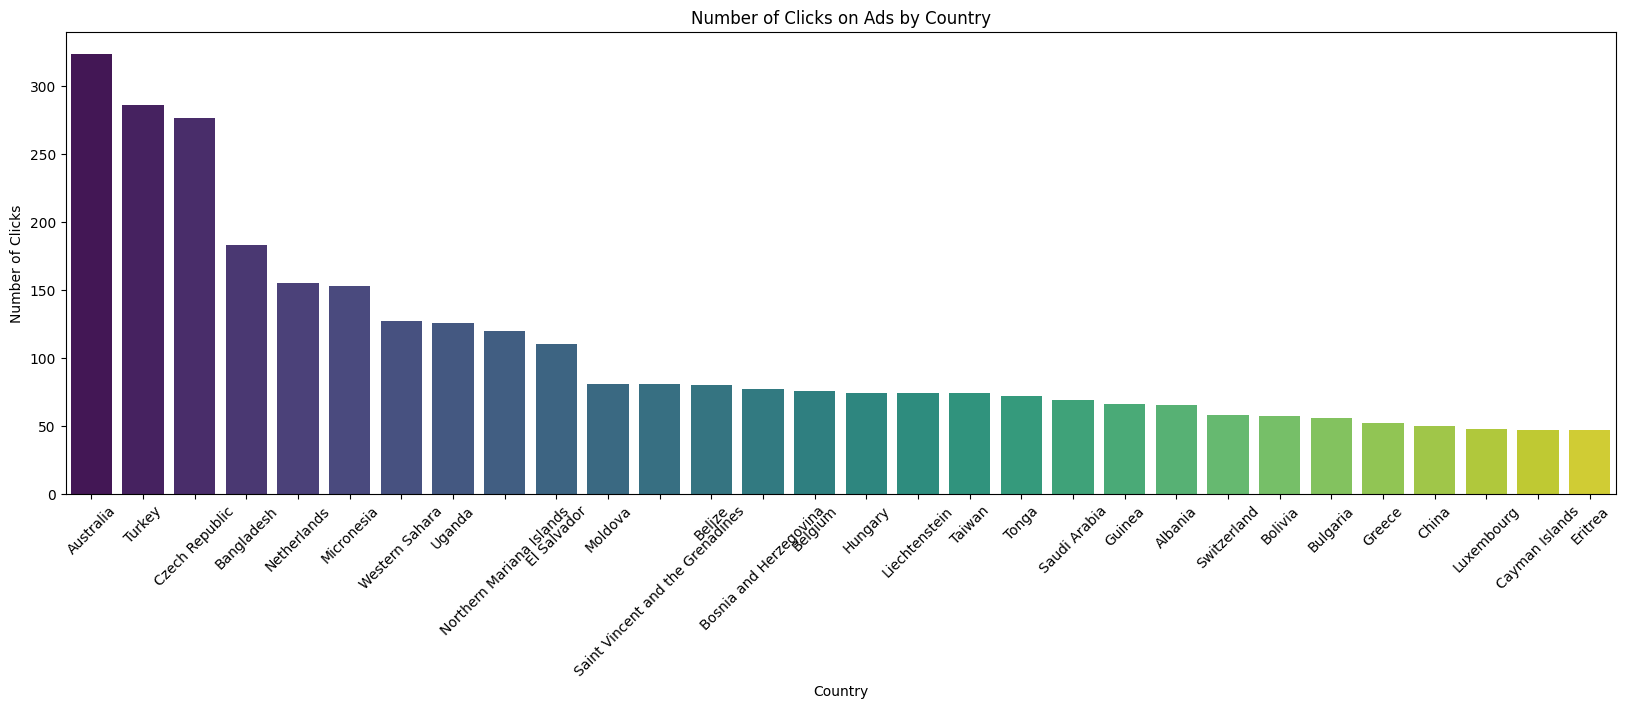

In [329]:
clicks_per_country = df.groupby("Country")["Clicked on Ad"].sum().nlargest(30).reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='Country', y='Clicked on Ad', data=clicks_per_country, palette='viridis')
plt.title('Number of Clicks on Ads by Country')
plt.xlabel('Country')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()

# In the above charts, we can see how month, day, hour, country and city affect on clicking on ads.

In [330]:
#Daily Time Spent on Site	Age	Area Income	Daily Internet Usage	Ad Topic Line	City	Gender	Country	Timestamp	Clicked on Ad

from sklearn.preprocessing import RobustScaler
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
robust_scaler = RobustScaler()
standardized_X_train = pd.DataFrame(robust_scaler.fit_transform(X_train[num_columns]), columns=num_columns)
standardized_X_test = pd.DataFrame(robust_scaler.transform(X_test[num_columns]), columns=num_columns)
standardized_X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,-0.662845,-0.384615,0.365259,0.426443
1,-0.319957,-0.769231,-0.225501,-0.639876
2,0.209602,0.538462,1.031207,-0.573204
3,-0.865281,-0.769231,1.108934,0.731690
4,-0.504837,-0.230769,-0.651825,0.279540
...,...,...,...,...
7487,-0.662845,-0.384615,0.365259,0.426443
7488,-0.662845,-0.615385,-0.223325,-0.797938
7489,-0.165890,0.230769,-0.988129,-0.742143
7490,-0.487997,1.076923,-0.651825,-0.760647


# As we saw, outlier capping don't capped any outlier, this is a little bit weird, so we used RobustScaler because of: resilience to outliers, improved model performance, preservation of distribution, applicability to various algorithms, ease of interpretation. Also we just do that for continues features.

In [352]:
#X_train[["Ad Topic Line", "City", "Country", "Clicked on Ad", "Ad Topic Line Code", "City Code", "Country Code", "Gender_Female", "Gender_Male", "Month", "Day", "Hour"]]
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
standardized_X_train = standardized_X_train.reset_index(drop=True)
standardized_X_test = standardized_X_test.reset_index(drop=True)

In [332]:
new_X_train = pd.concat([standardized_X_train, X_train[["Ad Topic Line", "City", "Country", "Clicked on Ad", "Ad Topic Line Code", "City Code", "Country Code", "Gender_Female", "Gender_Male", "Month", "Day", "Hour"]]],axis=1)
new_X_test = pd.concat([standardized_X_test, X_test[["Ad Topic Line", "City", "Country", "Clicked on Ad", "Ad Topic Line Code", "City Code", "Country Code", "Gender_Female", "Gender_Male", "Month", "Day", "Hour"]]],axis=1)
new_X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Clicked on Ad,Ad Topic Line Code,City Code,Country Code,Gender_Female,Gender_Male,Month,Day,Hour
0,-0.662845,-0.384615,0.365259,0.426443,Optional full-range projection,West Angelabury,Singapore,0,50,72,60,False,True,1,16,17
1,-0.319957,-0.769231,-0.225501,-0.639876,Focused multi-state workforce,Port Maria,Cameroon,0,15,2,66,True,False,5,15,13
2,0.209602,0.538462,1.031207,-0.573204,Optimized upward-trending productivity,Port Jeffrey,Turkey,1,149,138,237,False,True,4,3,21
3,-0.865281,-0.769231,1.108934,0.731690,Programmable uniform website,East Kevinbury,French Guiana,0,69,85,42,False,True,3,11,6
4,-0.504837,-0.230769,-0.651825,0.279540,Customizable tangible hierarchy,Lake Annashire,Vanuatu,0,24,4,116,False,True,3,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,-0.662845,-0.384615,0.365259,0.426443,Profound executive flexibility,West Angelabury,Singapore,1,12,72,60,False,True,1,3,3
7488,-0.662845,-0.615385,-0.223325,-0.797938,Managed zero tolerance concept,Kennedyfurt,Luxembourg,0,43,40,122,False,True,5,28,12
7489,-0.165890,0.230769,-0.988129,-0.742143,Intuitive exuding service-desk,North Randy,Egypt,0,147,88,25,True,False,1,5,11
7490,-0.487997,1.076923,-0.651825,-0.760647,Realigned content-based leverage,North Samantha,Malawi,1,58,17,16,True,False,4,4,7


# Concatinating standardized features with others.

c:\Users\mkaze\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:02:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


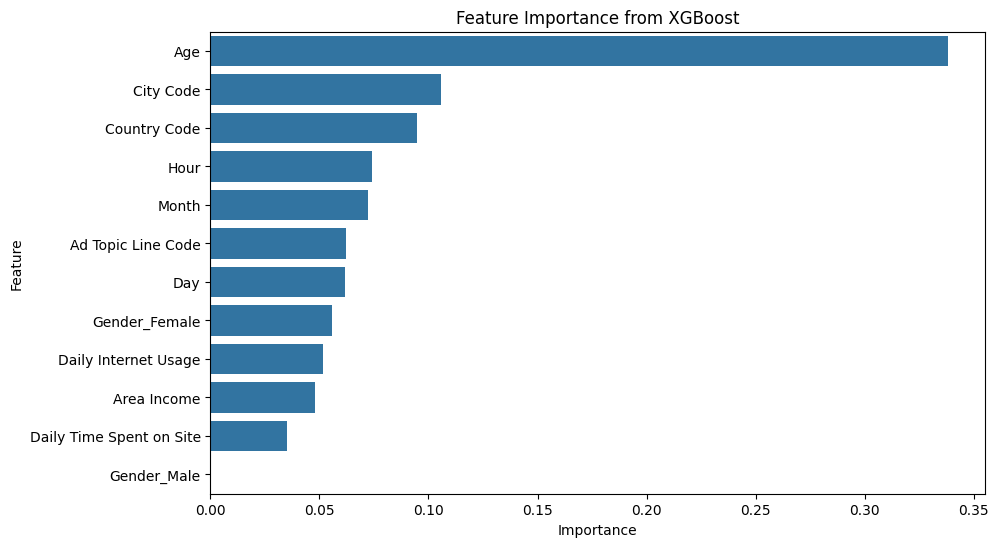

In [353]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = new_X_train.drop(columns=['Clicked on Ad','Ad Topic Line', 'City', 'Country'])
y = new_X_train['Clicked on Ad']

# Train an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_X_train = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_X_train)
plt.title('Feature Importance from XGBoost')
plt.show()


In [355]:
X = X[["Age", "City Code", "Country Code", "Month", "Hour", "Ad Topic Line Code", "Gender_Female", "Daily Internet Usage", "Area Income", "Daily Time Spanton Site"]]


# Using xgboost for finding feature importance and select important features.

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score

In [359]:
# Models with their hyperparameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    #'SVC': {
    #    'model': SVC(),
    #    'params': {
    #        'C': [0.1, 1],
    #        'kernel': ['linear'],
    #        'gamma': ['scale']
    #    }
    #},
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean', 'manhattan']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            # GaussianNB has no hyperparameters to tune
        }
    }
}

# Dictionary to store the results
results = {}

# Perform GridSearchCV for each model
for model_name, model_info in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X, y)
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Make predictions
    X_test = new_X_test.drop(columns=['Clicked on Ad','Ad Topic Line', 'City', 'Country'])
    X_test = X_test[["Age", "City Code", "Month", "Ad Topic Line Code"]]
    y_pred = best_model.predict(X_test)
    
    # Calculate F1-score and accuracy
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Best Params': grid_search.best_params_,
        'F1 Score': f1,
        'Accuracy': accuracy
    }
    print(f"{model_name} - F1 Score: {f1}, Accuracy: {accuracy}\n")

# Print out the results for each model
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['Best Params']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Accuracy: {result['Accuracy']}\n")

Tuning hyperparameters for LogisticRegression...
LogisticRegression - F1 Score: 0.5840071877807727, Accuracy: 0.6307814992025519

Tuning hyperparameters for RandomForestClassifier...
RandomForestClassifier - F1 Score: 0.6040329972502292, Accuracy: 0.6555023923444976

Tuning hyperparameters for GradientBoostingClassifier...
GradientBoostingClassifier - F1 Score: 0.5955882352941176, Accuracy: 0.6491228070175439

Tuning hyperparameters for KNeighborsClassifier...
KNeighborsClassifier - F1 Score: 0.45843118835133867, Accuracy: 0.5402711323763956

Tuning hyperparameters for DecisionTreeClassifier...
DecisionTreeClassifier - F1 Score: 0.5963302752293578, Accuracy: 0.6491228070175439

Tuning hyperparameters for GaussianNB...
GaussianNB - F1 Score: 0.5945478147987884, Accuracy: 0.6263955342902712

Model: LogisticRegression
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
F1 Score: 0.5840071877807727
Accuracy: 0.6307814992025519

Model: RandomForestClassifier
Best Parameters: {'m

# We used GridSearchCV for finding best parameters for each model. Also we calculated f1-score and accuracy for each model.